# Example for ERA5 weather data download

This example shows you how to download ERA5 weather data from the [Climate Data Store (CDS)](https://cds.climate.copernicus.eu) and store it locally. Furthermore, it shows how to convert the weather data to the format needed by the `pvlib` and `windpowerlib`.

In order to download ERA5 weather data you need an account at the [CDS](https://cds.climate.copernicus.eu).
Furthermore, you need to install the cdsapi package. See [here](https://cds.climate.copernicus.eu/api-how-to) for installation details. 

When downloading the data using the API your request gets queued and may take a while to be completed. All actual calls of the data download are therefore commented to avoid unintended download. Instead, an example netcdf file is provided.

* [Download data for single coordinate](#single_loc)
* [Download data for a region](#region)
* [Convert data into pvlib and windpowerlib format](#convert)


In [1]:
from feedinlib import era5

## Download data for single coordinate <a class="anchor" id="single_loc"></a>

To download data for a single location you have to specify latitude and longitude of the desired location. Data will be retrieved for the nearest weather data point to that location.

In [2]:
latitude = 52.47
longitude = 13.30

Besides a location you have to specify a time period for which you would like to download the data as well as the weather variables you need. The feedinlib provides predefined sets of variables that are needed to use the pvlib and windpowerlib. These can be applied by setting the `variable` parameter to "pvlib" or "windpowerlib", as shown below. If you want to download data for both libraries you can set `variable` to "feedinlib".

Concerning the start and end date, keep in mind that all timestamps in the `feedinlib` are in UTC. So if you later on want to convert the data to a different time zone, the data may not cover the whole period you intended to download. To avoid this set your start date to one day before the start of your required period if you are East of the zero meridian or your end date to one day after your required period ends if you are West of the zero meridian.

In [3]:
# set start and end date (end date will be included 
# in the time period for which data is downloaded)
start_date, end_date = '2017-01-01', '2017-12-31'
# set variable set to download
variable = "pvlib"

If you want to store the downloaded data, which is recommended as download may take a while, you may provide a filename (including path) to save data to.

In [4]:
target_file = 'ERA5_pvlib_2017.nc'

Now we can retrieve the data:

```python
# get windpowerlib data for specified location
ds = era5.get_era5_data_from_datespan_and_position(
    variable=variable,
    start_date=start_date, end_date=end_date, 
    latitude=latitude, longitude=longitude,
    target_file=target_file)
```

```bash
2020-01-12 20:53:56,465 INFO Welcome to the CDS
2020-01-12 20:53:56,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2020-01-12 20:53:57,023 INFO Request is queued
2020-01-12 20:53:58,085 INFO Request is running
2020-01-12 21:48:24,341 INFO Request is completed
2020-01-12 21:48:24,344 INFO Downloading request for 5 variables to ERA5_pvlib_2017.nc
2020-01-12 21:48:24,346 INFO Downloading http://136.156.132.153/cache-compute-0002/cache/data7/adaptor.mars.internal-1578858837.3774962-24514-9-8081d664-0a1e-48b9-951c-bc9b8e2caa44.nc to ERA5_pvlib_2017.nc (121.9K)
2020-01-12 21:48:24,653 INFO Download rate 400.6K/s
```

## Download data for a region<a class="anchor" id="region"></a>

When wanting to download weather data for a region instead of providing a single value for each latitude and longitude you have to provide latitude and longitude as lists in the following form:

In [5]:
latitude = [52.3, 52.7]  # [latitude south, latitude north]
longitude = [13.1, 13.6]  # [longitude west, longitude east]

In [6]:
target_file = 'ERA5_example_data.nc'

```python
# get pvlib data for specified area
ds_berlin = era5.get_era5_data_from_datespan_and_position(
    variable=variable,
    start_date=start_date, end_date=end_date, 
    latitude=latitude, longitude=longitude,
    target_file=target_file)
```

```bash
2020-01-12 22:55:35,301 INFO Download rate 1.6M/s 
2020-01-12 22:03:08,085 INFO Welcome to the CDS
2020-01-12 22:03:08,086 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2020-01-12 22:03:08,756 INFO Request is queued
2020-01-12 22:03:09,809 INFO Request is running
2020-01-12 22:55:34,863 INFO Request is completed
2020-01-12 22:55:34,864 INFO Downloading request for 5 variables to ERA5_example_data.nc
2020-01-12 22:55:34,864 INFO Downloading http://136.156.132.235/cache-compute-0006/cache/data5/adaptor.mars.internal-1578862989.052999-21409-23-831562a8-e0b2-4b19-8463-e14931a3f630.nc to ERA5_example_data.nc (720.7K)
```

If you want weather data for the whole world, you may leave latitude and longitude unspecified. 

```python
# get feedinlib data (includes pvlib and windpowerlib data)
# for the whole world
ds = era5.get_era5_data_from_datespan_and_position(
    variable="feedinlib",
    start_date=start_date, end_date=end_date,
    target_file=target_file)
```

## Convert data into pvlib and windpowerlib format<a class="anchor" id="convert"></a>

In order to use the weather data for your feed-in calculations using the pvlib and windpowerlib it has to be converted into the required format. This section shows you how this is done. 

In [7]:
era5_netcdf_filename = 'ERA5_example_data.nc'

In [8]:
# reimport downloaded data

import xarray as xr

ds = xr.open_dataset(era5_netcdf_filename)
ds

<xarray.Dataset>
Dimensions:    (latitude: 2, longitude: 3, time: 8760)
Coordinates:
  * longitude  (longitude) float32 13.1 13.35 13.6
  * latitude   (latitude) float32 52.6 52.35
  * time       (time) datetime64[ns] 2017-01-01 ... 2017-12-31T23:00:00
Data variables:
    u100       (time, latitude, longitude) float32 ...
    v100       (time, latitude, longitude) float32 ...
    fsr        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    fdir       (time, latitude, longitude) float32 ...
    ssrd       (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-01-15 08:23:42 GMT by grib_to_netcdf-2.15.0: /opt/ecmw...

Let's first plot the downloaded weather data points on a map.

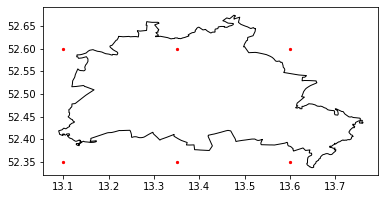

In [9]:
# get all weather data points in dataset
from shapely.geometry import Point
import geopandas as gpd

points = []
for x in ds.longitude:
    for y in ds.latitude:
        points.append(Point(x, y))
points_df = gpd.GeoDataFrame({'geometry': points})

# read provided shape file
region_shape = gpd.read_file('berlin_shape.geojson')

# plot weather data points on map
base = region_shape.plot(color='white', edgecolor='black')
points_df.plot(ax=base, marker='o', color='red', markersize=5);

Now let's convert the weather data to the pvlib format.

With the `area` parameter you can specify wether you want to retrieve weather dataframes for a single location, a region within the downloaded region or the whole downloaded region.
In case `area` is not a single location, the index of the resulting dataframe will be a multiindex with levels (time, latitude, longitude). Be aware that in order to use it for pvlib or windpowerlib calculations you need to select a **single location**.

In [10]:
# for single location (as list of longitude and latitude)
single_location = [13.2, 52.4]
pvlib_df = era5.weather_df_from_era5(
    era5_netcdf_filename=era5_netcdf_filename,
    lib='pvlib',
    area=single_location)
pvlib_df.head()

,wind_speed,temp_air,ghi,dhi
time,,,,
2016-12-31 23:30:00+00:00,4.121585,2.118927,0.0,0.0
2017-01-01 00:30:00+00:00,4.163627,2.007660,0.0,0.0
2017-01-01 01:30:00+00:00,4.100729,1.931793,0.0,0.0
2017-01-01 02:30:00+00:00,4.079637,1.808319,0.0,0.0
2017-01-01 03:30:00+00:00,4.123112,1.748505,0.0,0.0


In [11]:
# for whole region
era5.weather_df_from_era5(
    era5_netcdf_filename=era5_netcdf_filename,
    lib='pvlib').head()

wind_speed  temp_air  ghi  dhi
time                      latitude  longitude                                
2016-12-31 23:30:00+00:00 52.349998 13.10        4.121585  2.118927  0.0  0.0
                                    13.35        4.101637  1.987091  0.0  0.0
                                    13.60        4.169553  1.758789  0.0  0.0
                          52.599998 13.10        4.152351  2.745270  0.0  0.0
                                    13.35        4.228467  2.489319  0.0  0.0

In [12]:
# specify rectangular area
area = [(13.2, 13.7), (52.4, 52.8)]
era5.weather_df_from_era5(
    era5_netcdf_filename=era5_netcdf_filename,
    lib='pvlib',
    area=area).head()

wind_speed  temp_air  ghi  dhi
time                      latitude  longitude                                
2016-12-31 23:30:00+00:00 52.599998 13.35        4.228467  2.489319  0.0  0.0
                                    13.60        4.326597  2.234680  0.0  0.0
2017-01-01 00:30:00+00:00 52.599998 13.35        4.350266  2.461670  0.0  0.0
                                    13.60        4.482446  2.222443  0.0  0.0
2017-01-01 01:30:00+00:00 52.599998 13.35        4.323196  2.482239  0.0  0.0

In [13]:
# specify area giving a Polygon
from shapely.geometry import Polygon
lat_point_list = [52.3, 52.3, 52.65]
lon_point_list = [13.0, 13.4, 13.4]
area = Polygon(zip(lon_point_list, lat_point_list))
era5.weather_df_from_era5(
    era5_netcdf_filename=era5_netcdf_filename,
    lib='pvlib',
    area=area).head()

wind_speed  temp_air  ghi  dhi
time                      latitude  longitude                                
2016-12-31 23:30:00+00:00 52.349998 13.10        4.121585  2.118927  0.0  0.0
                                    13.35        4.101637  1.987091  0.0  0.0
                          52.599998 13.35        4.228467  2.489319  0.0  0.0
2017-01-01 00:30:00+00:00 52.349998 13.10        4.163627  2.007660  0.0  0.0
                                    13.35        4.189184  1.882263  0.0  0.0

In [16]:
# export to csv
pvlib_df.to_csv('pvlib_df.csv')

The conversion to the windpowerlib format is analog to the pvlib conversion.

In [17]:
# for whole region
windpowerlib_df = era5.weather_df_from_era5(
    era5_netcdf_filename=era5_netcdf_filename,
    lib='windpowerlib',
    area=single_location)
windpowerlib_df.head()

variable                  wind_speed                 pressure temperature  \
height                           10        100            0           2     
time                                                                        
2016-12-31 23:00:00+00:00   4.121585  7.630205  101724.648438  275.268921   
2017-01-01 00:00:00+00:00   4.163627  7.771536  101651.937500  275.157654   
2017-01-01 01:00:00+00:00   4.100729  7.626108  101596.093750  275.081787   
2017-01-01 02:00:00+00:00   4.079637  7.683256  101518.140625  274.958313   
2017-01-01 03:00:00+00:00   4.123112  7.773755  101432.914062  274.898499   

variable                  roughness_length  
height                                 0    
time                                        
2016-12-31 23:00:00+00:00         0.700549  
2017-01-01 00:00:00+00:00         0.700506  
2017-01-01 01:00:00+00:00         0.700445  
2017-01-01 02:00:00+00:00         0.700402  
2017-01-01 03:00:00+00:00         0.700367

Furthermore, it is possible to specify a start and end date to retrieve data for. They must be provided as something that can be converted to a timestamp, i.e. '2013-07-02'.

In [21]:
# get weather data in pvlib format for July
start = '2017-07-01'
end = '2017-07-31'
era5.weather_df_from_era5(
    era5_netcdf_filename=era5_netcdf_filename,
    lib='pvlib', 
    area=single_location, 
    start=start, 
    end=end).head()

,wind_speed,temp_air,ghi,dhi
time,,,,
2017-07-01 00:30:00+00:00,3.309819,14.204041,0.000000,0.000000
2017-07-01 01:30:00+00:00,3.462380,13.834900,0.000000,0.000000
2017-07-01 02:30:00+00:00,3.371482,13.832336,0.039410,0.039410
2017-07-01 03:30:00+00:00,3.314813,13.986023,16.395382,16.229132
2017-07-01 04:30:00+00:00,3.459977,14.591156,72.005661,65.997398


The following shows you in short how to use the weather data for feed-in calculations and mainly serves as a test wether the conversion works correctly. More detailed explanation on feed-in calculations using the feedinlib can be found in the notebooks `run_pvlib_model.ipynb` and `run_windpowerlib_turbine_model.ipynb`.

/home/birgit/virtualenvs/feedinlib_openmod/lib/python3.6/site-packages/pvlib/pvsystem.py:1685: RuntimeWarning: effective_irradiance inputs appear to be in suns. Units changed in v0.7 from suns to W/m2
  RuntimeWarning)


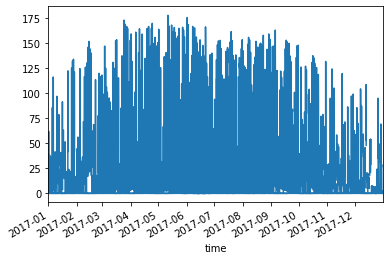

In [19]:
from feedinlib import Photovoltaic
system_data = {
    'module_name': 'Advent_Solar_Ventura_210___2008_', 
    'inverter_name': 'ABB__MICRO_0_25_I_OUTD_US_208__208V_',
    'azimuth': 180,
    'tilt': 30,
    'albedo': 0.2}
pv_system = Photovoltaic(**system_data)
feedin = pv_system.feedin(
    weather=pvlib_df,
    location=(52.4, 13.2))
feedin.plot()

/home/birgit/virtualenvs/feedinlib_openmod/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


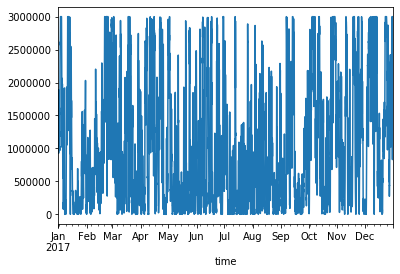

In [20]:
from feedinlib import WindPowerPlant
turbine_data = {
    'turbine_type': 'E-101/3050',
    'hub_height': 135
    }
wind_turbine = WindPowerPlant(**turbine_data)
feedin = wind_turbine.feedin(
    weather=windpowerlib_df)
feedin.plot()